In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys
from tqdm import tqdm
sys.path.append('/home/drdarby/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
from scipy.interpolate import griddata


In [3]:
to_hd = '/media/basil/Elements/data/'
data_files, data_filepath = tools.get_data_paths_from_binary(to_hd,'Davis',file_end='nc')
data_files

FileNotFoundError: [Errno 2] No such file or directory: '/media/basil/Elements/data/Davis'

In [5]:
data = xr.open_dataset(data_filepath[1])

In [6]:
print(data.lon)
lon_sampled = np.array(data.lon)
lat_sampled = np.array(data.lat)

<xarray.DataArray 'lon' (x: 70)>
[70 values with dtype=float32]
Coordinates:
  * x        (x) float32 0.0 1.439 3.027 3.097 4.684 ... 315.0 320.0 325.0 330.0
Attributes:
    short_name:  lon
    long_name:   longitude
    units:       degrees west


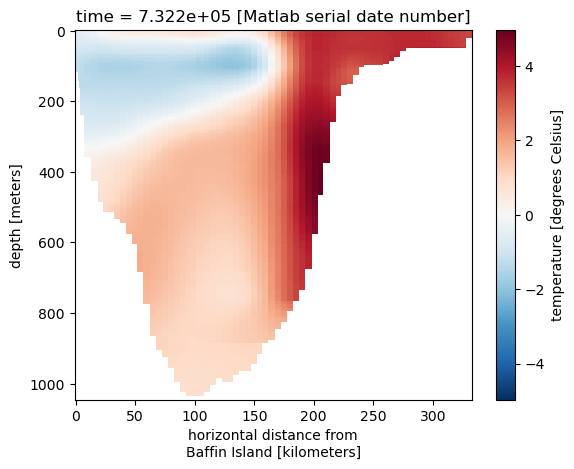

In [5]:
data['temperature'].isel(time=0).plot(y='depth')
plt.gca().invert_yaxis()
plt.savefig('output_test.png')

In [6]:
grid = xr.open_dataset(to_hd+'llc270/llc270_grid_test.nc')


In [8]:
llc270_data = '/media/basil/Elements/data/llc270/'
model_salt_files, model_salt_filepath = tools.get_data_paths_from_binary(llc270_data,'SALT',file_end='nc')
model_salt = xr.open_mfdataset(model_salt_filepath)
model_temp_files, model_temp_filepath = tools.get_data_paths_from_binary(llc270_data,'THETA',file_end='nc')
model_temp = xr.open_mfdataset(model_temp_filepath)

In [9]:
model_temp

<xarray.Dataset>
Dimensions:   (tile: 13, j: 270, i: 270, k: 50, time: 312)
Coordinates:
  * tile      (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    timestep  (time) int64 dask.array<chunksize=(12,), meta=np.ndarray>
  * time      (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16T12:00:00
Data variables:
    THETA     (time, k, tile, j, i) float32 dask.array<chunksize=(12, 50, 13, 270, 270), meta=np.ndarray>

In [10]:
salt = model_salt['SALT'].isel(tile=10)#.rename({'j':'i','i':'j'})
temp = model_temp['THETA'].isel(tile=10)
model_gridded = xr.merge([temp,salt,grid.isel(tile=10)])#.rename({'XC':'YC','YC':'XC'})])

In [11]:
model_gridded = model_gridded.set_coords({'XC','YC'})#['SALT'].isel(time=0,k=0).plot(x='XC',y='YC')
#plt.gca().invert_yaxis()
#plt.savefig('./bad_grid.png')

In [12]:
lon_sampled = np.array(data.lon)
lat_sampled = np.array(data.lat)


In [15]:
model_gridded

<xarray.Dataset>
Dimensions:   (j: 270, i: 270, k: 50, time: 312)
Coordinates:
    tile      int64 10
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    timestep  (time) int64 dask.array<chunksize=(12,), meta=np.ndarray>
  * time      (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16T12:00:00
    XC        (i, j) float32 ...
    YC        (i, j) float32 ...
Data variables:
    THETA     (time, k, j, i) float32 dask.array<chunksize=(12, 50, 270, 270), meta=np.ndarray>
    SALT      (time, k, j, i) float32 dask.array<chunksize=(12, 50, 270, 270), meta=np.ndarray>
    DXC       (i, j) float32 ...
    DXG       (i, j) float32 ...
    DYC       (i, j) float32 ...
    DYG       (i, j) float32 ...
    Depth     (i, j) float32 ...
    RAC       (i, j) float32 ...
    RAZ       (i, j) float32 ...
    XG        (i, j) float32 ...
    YG        (i, j) float32 ...
    hFacC     (k, i, j) float64 ...
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC

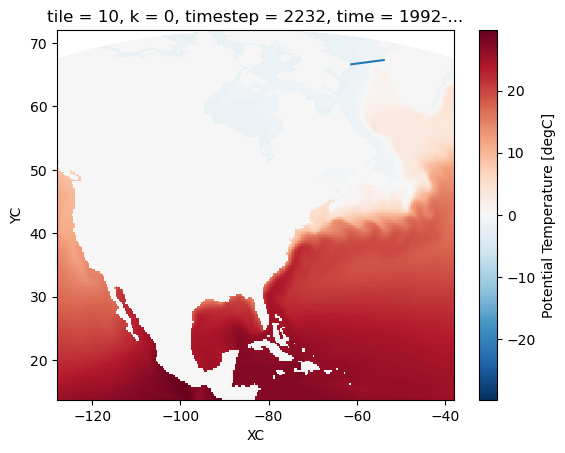

In [13]:
model_gridded['THETA'].isel(k=0,time=0).plot(x='XC',y='YC')
plt.plot(lon_sampled*-1,lat_sampled)
plt.savefig('./transect_location.png')

In [12]:
-1*lon_sampled

array([-61.274372, -61.241764, -61.207527, -61.2059  , -61.17166 ,
       -61.052647, -60.943413, -60.793427, -60.72169 , -60.61083 ,
       -60.499966, -60.389103, -60.27824 , -60.16738 , -60.102165,
       -59.945656, -59.834793, -59.72393 , -59.613068, -59.500576,
       -59.389713, -59.27885 , -59.167988, -59.110928, -58.944633,
       -58.833775, -58.72291 , -58.610416, -58.499557, -58.387062,
       -58.2762  , -58.163708, -58.052845, -57.940353, -57.82949 ,
       -57.76754 , -57.606136, -57.493645, -57.381153, -57.27029 ,
       -57.138233, -57.045303, -56.93281 , -56.789345, -56.709457,
       -56.596966, -56.438824, -56.37198 , -56.259487, -56.146996,
       -56.00353 , -55.92201 , -55.809517, -55.697025, -55.584534,
       -55.452477, -55.357918, -55.245426, -55.13293 , -55.01392 ,
       -54.90632 , -54.793823, -54.643833, -54.56721 , -54.454716,
       -54.340595, -54.2281  , -54.11561 , -54.001488, -53.887363],
      dtype=float32)

In [14]:
from scipy.interpolate import griddata
transect_lon = lon_sampled*-1
transect_lat = lat_sampled
# lat = model_gridded['SALT'].YC
# lon = model_gridded['SALT'].XC
# Lon, Lat = lon,lat
lat_cut = model_gridded.where(np.logical_and(transect_lat.max()+.5>model_gridded.YC,transect_lat.min()-.5<model_gridded.YC))
lon_cut = lat_cut.where(np.logical_and(transect_lon.max()+.5>lat_cut.XC,transect_lon.min()-.5<lat_cut.XC))
tran_cut = lon_cut.dropna(how='all',dim='i').dropna(how='all',dim='j')

In [1]:
tran_cut.to_netcdf(llc270_data+'davis_box_ST.nc')

NameError: name 'tran_cut' is not defined

In [14]:
# tran_cut.close()
# lon_cut.close()
# lat_cut.close()
tran_cut = xr.open_dataset(llc270_data+'davis_box_ST.nc')

In [80]:
tran_cut['RAZ']

<xarray.DataArray 'RAZ' (i: 17, j: 26)>
[442 values with dtype=float32]
Coordinates:
    tile     int64 ...
  * j        (j) int64 193 194 195 196 197 198 199 ... 213 214 215 216 217 218
  * i        (i) int64 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
    XC       (i, j) float32 -61.08 -60.72 -60.37 -60.01 ... -54.36 -54.03 -53.71
    YC       (i, j) float32 68.5 68.47 68.44 68.41 ... 65.71 65.68 65.66 65.63

In [36]:
from scipy.interpolate import griddata
transect_lon = lon_sampled*-1
transect_lat = lat_sampled
lat_cut = model_gridded.where(np.logical_and(transect_lat.max()+.5>model_gridded.YC,transect_lat.min()-.5<model_gridded.YC))
lon_cut = lat_cut.where(np.logical_and(transect_lon.max()+.5>lat_cut.XC,transect_lon.min()-.5<lat_cut.XC))
tran_cut = lon_cut.dropna(how='all',dim='i').dropna(how='all',dim='j')
lon = tran_cut.XC
lat = tran_cut.YC
Lon, Lat = lon,lat
points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])
sampled_transect_depth_mult = griddata(points, np.array(tran_cut['Depth']).ravel(), (transect_lon, transect_lat))

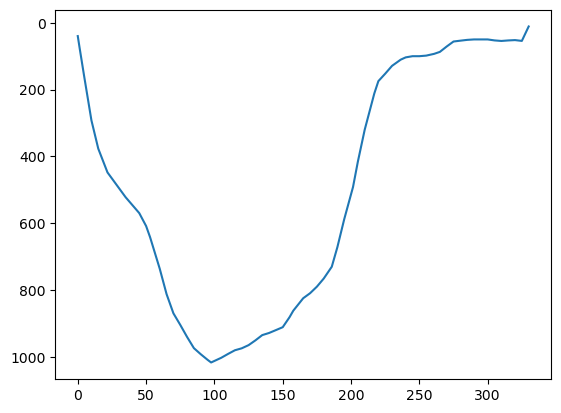

In [39]:
plt.plot(data.x,sampled_transect_depth_mult)
plt.gca().invert_yaxis()
plt.savefig('./model_depth.png')

In [98]:

lon = tran_cut.XC
lat = tran_cut.YC
Lon, Lat = lon,lat
points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])
#model_data_subsampled = np.zeros((2,len(tran_cut.time),len(tran_cut['k']),70))
#model_data_subsampled[0,:,:,:] = 'SALT'
#model_data_subsampled[1,:,:,:] = 'THETA'
shape = (50)
file_path = llc270_data +'grid/RC.data'
RC = np.fromfile(file_path,'>f4')
RC = np.reshape(RC, shape)
for i in tqdm(range(0,len(tran_cut.time))):
    for j in range(0,len(tran_cut['k'])):
        tran_cut_time_k = tran_cut.isel(time=i,k=j)
        time = [np.array(tran_cut_time_k.time)]
        k_num = [RC[j]]
        sampled_transect_salt = griddata(points, np.array(tran_cut_time_k['SALT']).T.ravel(), (transect_lon, transect_lat))
        sampled_transect_temp = griddata(points, np.array(tran_cut_time_k['THETA']).T.ravel(), (transect_lon, transect_lat))
        sampled_transect_salt = np.reshape(sampled_transect_salt, (1,1,70))
        sampled_transect_temp = np.reshape(sampled_transect_temp, (1,1,70))
        salt_data = xr.DataArray(sampled_transect_salt ,coords=[time,k_num,data.x],dims=['time','depth','x'],name='SALT')
        temp_data = xr.DataArray(sampled_transect_temp,coords=[time,k_num,data.x],dims=['time','depth','x'],name='THETA')
        salt_data.to_netcdf(llc270_data+'davis-subsample/SALT_'+str(i).zfill(4)+'_'+str(j).zfill(2)+'.nc')
        temp_data.to_netcdf(llc270_data+'davis-subsample/THETA_'+str(i).zfill(4)+'_'+str(j).zfill(2)+'.nc')
        

100%|█████████████████████████████████████████| 312/312 [08:25<00:00,  1.62s/it]


In [13]:
salttemp_files, salttemp_filepaths = tools.get_data_paths_from_binary(llc270_data,'davis-subsample',file_end='nc')

In [14]:
data_subsampled = xr.open_mfdataset(salttemp_filepaths)
#data_subsampled = xr.open_mfdataset(llc270_data+'davis_subsampled.nc')

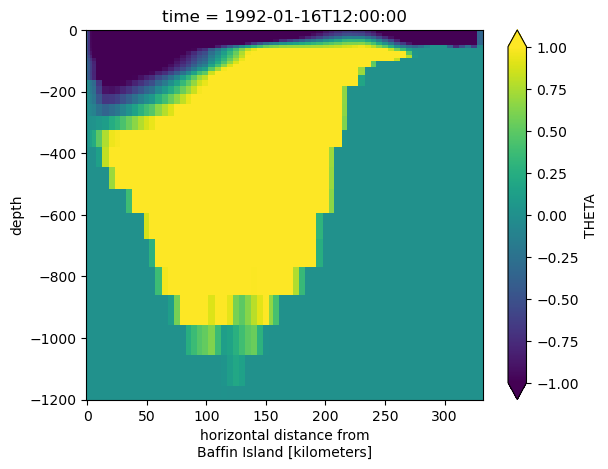

In [18]:
data_subsampled.isel(time=0)['THETA'].plot(vmin=-1,vmax=1)
plt.ylim(-1200,0)
plt.savefig('./bath_model.png')

In [86]:
#data_subsampled.to_netcdf(llc270_data+'davis_subsampled.nc')

/tmp/ipykernel_8248/565475155.py:1: UserWarning: Times can't be serialized faithfully to int64 with requested units 'days since 1992-01-16T12:00:00'. Serializing with units 'hours since 1992-01-16T12:00:00' instead. Set encoding['dtype'] to floating point dtype to serialize with units 'days since 1992-01-16T12:00:00'. Set encoding['units'] to 'hours since 1992-01-16T12:00:00' to silence this warning .
  data_subsampled.to_netcdf(llc270_data+'davis_subsampled.nc')


In [94]:
shape = (50)
file_path = llc270_data +'grid/RC.data'
RC = np.fromfile(file_path,'>f4')
RC = np.reshape(RC, shape)

-5.0

In [169]:
data.depth*-1

<xarray.DataArray 'depth' (depth: 161)>
array([   -0.,    -4.,    -8.,   -12.,   -16.,   -20.,   -24.,   -28.,
         -32.,   -36.,   -40.,   -44.,   -48.,   -52.,   -56.,   -60.,
         -64.,   -68.,   -72.,   -76.,   -80.,   -84.,   -88.,   -92.,
         -96.,  -100.,  -104.,  -108.,  -112.,  -116.,  -120.,  -124.,
        -128.,  -132.,  -136.,  -140.,  -144.,  -148.,  -152.,  -156.,
        -160.,  -164.,  -168.,  -172.,  -176.,  -180.,  -184.,  -188.,
        -192.,  -196.,  -200.,  -204.,  -208.,  -212.,  -216.,  -220.,
        -224.,  -228.,  -232.,  -236.,  -240.,  -244.,  -248.,  -252.,
        -256.,  -260.,  -264.,  -268.,  -272.,  -276.,  -280.,  -284.,
        -288.,  -292.,  -296.,  -300.,  -304.,  -308.,  -312.,  -316.,
        -320.,  -324.,  -328.,  -332.,  -336.,  -340.,  -344.,  -348.,
        -352.,  -356.,  -360.,  -364.,  -368.,  -372.,  -380.,  -390.,
        -400.,  -410.,  -420.,  -430.,  -440.,  -450.,  -460.,  -470.,
        -480.,  -490.,  -500.,  -510.,  -520.,  -530.,  -540.,  -550.,
        -560.,  -570.,  -580.,  -590.,  -600.,  -610.,  -620.,  -630.,
        -640.,  -650.,  -660.,  -670.,  -680.,  -690.,  -700.,  -710.,
        -720.,  -730.,  -740.,  -750.,  -760.,  -770.,  -780.,  -790.,
        -800.,  -810.,  -820.,  -830.,  -840.,  -850.,  -860.,  -870.,
        -880.,  -890.,  -900.,  -910.,  -920.,  -930.,  -940.,  -950.,
        -960.,  -970.,  -980.,  -990., -1000., -1010., -1020., -1030.,
       -1040.], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.0 4.0 8.0 12.0 ... 1.02e+03 1.03e+03 1.04e+03

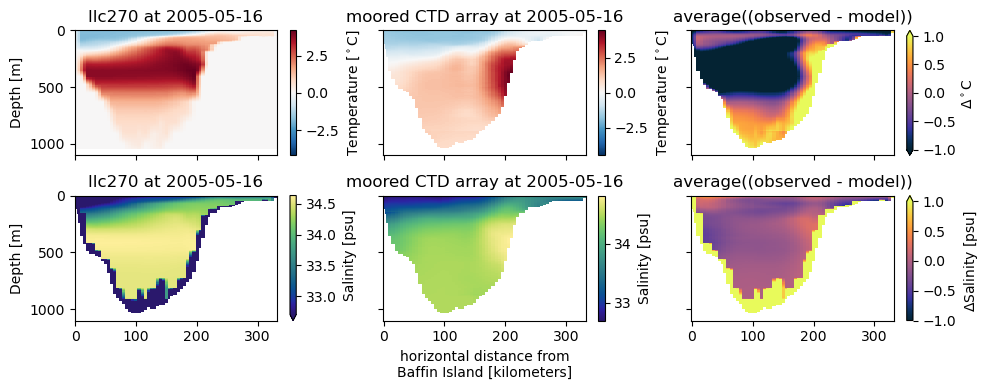

In [92]:
datenums = data.time
time = pd.to_datetime(datenums-719529, unit='D')
fig,ax = plt.subplots(ncols=3, nrows=2,figsize=(10,4),sharex=True,sharey=True,)


data_subsampled.sel(time=slice('2004-10','2010-09'))['THETA'].isel(time=7).interp(depth=data.depth*-1).plot(ax=ax[0,0],cbar_kwargs={'label':'Temperature [$^\circ$C]'})
ax[0,0].set_title('llc270 at '+str(time[7])[0:10])
#plt.ylim(0,200)
plt.tight_layout()

#ax.gca().invert_yaxis()

#plt.ylim(-1100,0)
ax[0,0].set_ylabel('Depth [m]')

data['temperature'].isel(time=7).plot(y='depth',ax=ax[0,1],cbar_kwargs={'label':'Temperature [$^\circ$C]'})
ax[0,1].set_title('moored CTD array at '+ str(time[7])[0:10])

#plt.ylim(0,1100)temp
ax[0,1].set_ylabel('')
#plt.ylim(0,200)

#plt.gca().invert_yaxis()

diff_temp = data['temperature']- data_subsampled.sel(time=slice('2004-10','2010-09'))['THETA'].interp(depth=data.depth*-1)
diff_temp.mean(dim='time').plot(y='depth',vmin=-1,vmax=1, cmap=cm.cm.thermal,ax=ax[0,2],cbar_kwargs={'label':'$\Delta$$^\circ$C '})
ax[0,2].set_title('average((observed - model))')
ax[0,2].set_ylabel('')
ax[0,2].set_ylim(0,1100)
#plt.ylim(0,200)
#plt.gca().invert_yaxis()

plt.tight_layout()
#plt.subplot(2,3,(1,0))

data_subsampled.sel(time=slice('2004-10','2010-09'))['SALT'].isel(time=7).interp(depth=data.depth*-1).where(np.isfinite(data['salinity'].isel(time=0))).plot(vmin = 32.7,ax=ax[1,0],cmap=cm.cm.haline,cbar_kwargs={'label':'Salinity [psu]'})
ax[1,0].set_title('llc270 at '+str(time[7])[0:10])
#plt.ylim(0,200)

#ax.invert_yaxis()

#plt.ylim(-1100,0)
ax[1,0].set_ylabel('Depth [m]')

#plt.subplot(1,3,(1,1))
data['salinity'].isel(time=7).plot(y='depth',ax=ax[1,1],cmap=cm.cm.haline,cbar_kwargs={'label':'Salinity [psu]'})
ax[1,1].set_title('moored CTD array at '+ str(time[7])[0:10])

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[0,2].set_xlabel('')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[0,2].set_xlabel('')
ax[1,0].set_xlabel('')
#plt.ylim(0,1100)
ax[1,1].set_ylabel('')
#plt.ylim(0,200)

#plt.gca().invert_yaxis()

diff_temp = data['salinity']- data_subsampled.sel(time=slice('2004-10','2010-09'))['SALT'].interp(depth=data.depth*-1)
diff_temp.mean(dim='time').plot(y='depth',vmin=-1,vmax=1, cmap=cm.cm.thermal,ax=ax[1,2],cbar_kwargs={'label':'$\Delta$Salinity [psu]'})
ax[1,2].set_title('average((observed - model))')
ax[1,2].set_ylabel('')
ax[1,2].set_ylim(0,1100)
#plt.ylim(0,200)
#plt.gca().invert_yaxis()
ax[1,2].set_xlabel('')
ax[1,1].set_ylim(1100,0)
ax[1,0].set_ylim(1100,0)
ax[0,0].set_ylim(1100,0)
ax[0,1].set_ylim(1100,0)
ax[0,2].set_ylim(1100,0)
plt.tight_layout()

plt.savefig('./direct_match.png')

In [9]:
llc1080_path = '/media/basil/Elements/data/L1_llc1080/'
var = 'nc_files'
llc1080_files, llc1080_filepaths = tools.get_data_paths_from_binary(llc1080_path,var,file_end='nc')

In [10]:
llc1080_data = xr.open_mfdataset(llc1080_filepaths).set_coords({'longitude','latitude'})

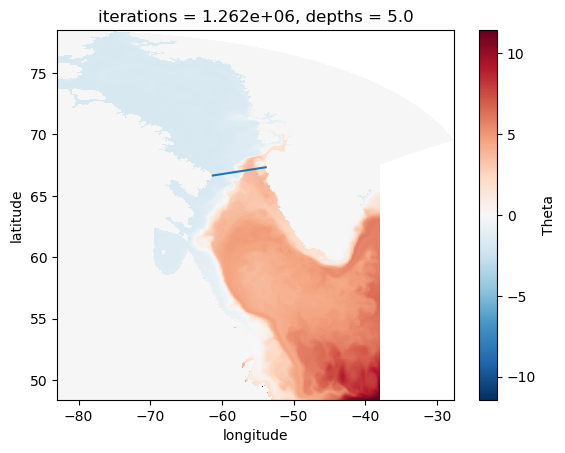

In [11]:
llc1080_data.isel(iterations=0,depths=0)['Theta'].plot(x='longitude',y='latitude')
#model_gridded['THETA'].isel(k=0,time=0).plot(x='XC',y='YC')
plt.plot(lon_sampled*-1,lat_sampled)
plt.xlim()
plt.ylim()
plt.savefig('./transect_.png')

In [19]:
model_interped = data_subsampled.sel(time=slice('2004-10','2010-09')).interp(depth=data.depth*-1)

In [85]:
#model_interped = model_interped.rename({'SALT':'salinity_270','THETA':'temperature_270'})
model_interped

<xarray.Dataset>
Dimensions:          (time: 72, x: 70, depth: 161)
Coordinates:
  * time             (time) datetime64[ns] 2004-10-16T12:00:00 ... 2010-09-16
  * x                (x) float32 0.0 1.439 3.027 3.097 ... 320.0 325.0 330.0
  * depth            (depth) float32 0.0 4.0 8.0 ... 1.02e+03 1.03e+03 1.04e+03
Data variables:
    salinity_270     (time, depth, x) float64 dask.array<chunksize=(1, 161, 70), meta=np.ndarray>
    temperature_270  (time, depth, x) float64 dask.array<chunksize=(1, 161, 70), meta=np.ndarray>

(1200.0, 0.0)

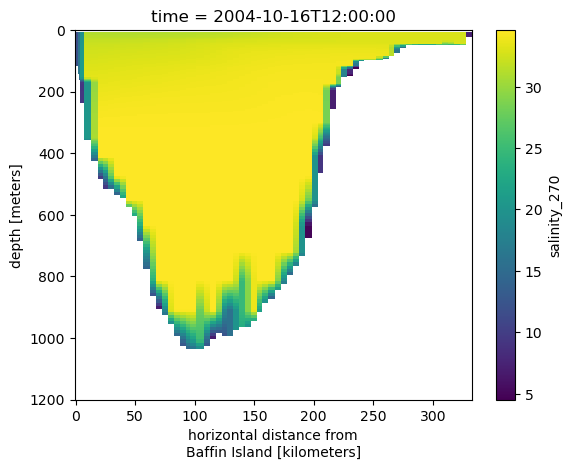

In [91]:
model_observe['salinity_270'].where(np.isfinite(model_observe['salinity'])).isel(time=0).plot()
plt.ylim(1200,0)

In [22]:
data['time'] = model_interped.time

In [23]:
model_observe = xr.merge([model_interped,data])

In [133]:
model_observe['time.day']
model_observe['time.year']


<xarray.DataArray 'year' (time: 72)>
array([2004, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005,
       2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
       2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2007,
       2007, 2007, 2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008, 2008,
       2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009, 2009, 2009, 2009,
       2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2010, 2010, 2010,
       2010, 2010, 2010, 2010, 2010, 2010])
Coordinates:
  * time     (time) datetime64[ns] 2004-10-16T12:00:00 2004-11-16 ... 2010-09-16

In [25]:
model_observe.to_netcdf(to_hd+'Davis/model_and_observable_dataset.nc')

/tmp/ipykernel_15274/2183855103.py:1: SerializationWarning: saving variable time with floating point data as an integer dtype without any _FillValue to use for NaNs
  model_observe.to_netcdf(to_hd+'Davis/model_and_observable_dataset.nc')


In [123]:
#data_sub_depth = data_subsampled.where(data_subsampled.depth>-1100).dropna(how='any',dim='depth')

In [124]:
#data_sub_depth.to_netcdf(llc270_data+'davis_subsampled.nc')

/tmp/ipykernel_8248/3647958461.py:1: UserWarning: Times can't be serialized faithfully to int64 with requested units 'days since 1992-01-16T12:00:00'. Serializing with units 'hours since 1992-01-16T12:00:00' instead. Set encoding['dtype'] to floating point dtype to serialize with units 'days since 1992-01-16T12:00:00'. Set encoding['units'] to 'hours since 1992-01-16T12:00:00' to silence this warning .
  data_sub_depth.to_netcdf(llc270_data+'davis_subsampled.nc')


In [165]:
datenums = data.time
time = pd.to_datetime(datenums-719529, unit='D')
#python_datetime = datetime.fromordinal(int(matlab_datenum)) + datetime.timedelta(days=matlab_datenum%1) - datetime.timedelta(days = 366)
data
time = pd.to_datetime(datenums-719529, unit='D')

In [166]:
time

DatetimeIndex(['2004-10-15', '2004-11-15', '2004-12-15', '2005-01-15',
               '2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15', '2005-12-15', '2006-01-15',
               '2006-02-15', '2006-03-15', '2006-04-15', '2006-05-15',
               '2006-06-15', '2006-07-15', '2006-08-15', '2006-09-15',
               '2006-10-15', '2006-11-15', '2006-12-15', '2007-01-15',
               '2007-02-15', '2007-03-15', '2007-04-15', '2007-05-15',
               '2007-06-15', '2007-07-15', '2007-08-15', '2007-09-15',
               '2007-10-15', '2007-11-15', '2007-12-15', '2008-01-15',
               '2008-02-15', '2008-03-15', '2008-04-15', '2008-05-15',
               '2008-06-15', '2008-07-15', '2008-08-15', '2008-09-15',
               '2008-10-15', '2008-11-15', '2008-12-15', '2009-01-15',
               '2009-02-15', '2009-03-15', '2009-04-15', '2009-05-15',
      

In [ ]:
salt_and_temp_data.to_netcdf(to_hd+'Davis/temp_salt_llc270_davis.nc')

In [104]:
llc1080_data

<xarray.Dataset>
Dimensions:     (iterations: 84, depths: 50, rows: 720, cols: 540)
Coordinates:
  * iterations  (iterations) float32 1.262e+06 1.271e+06 ... 1.981e+06 1.99e+06
    longitude   (iterations, rows, cols) float32 dask.array<chunksize=(1, 720, 540), meta=np.ndarray>
    latitude    (iterations, rows, cols) float32 dask.array<chunksize=(1, 720, 540), meta=np.ndarray>
  * depths      (depths) float32 5.0 15.0 25.0 ... 5.039e+03 5.461e+03 5.906e+03
Dimensions without coordinates: rows, cols
Data variables:
    time        (iterations) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    Theta       (iterations, depths, rows, cols) float32 dask.array<chunksize=(1, 50, 720, 540), meta=np.ndarray>
    Salt        (iterations, depths, rows, cols) float32 dask.array<chunksize=(1, 50, 720, 540), meta=np.ndarray>

In [105]:
transect_lon = lon_sampled*-1
transect_lat = lat_sampled
lat_cut = llc1080_data.where(np.logical_and(transect_lat.max()+.5>llc1080_data.latitude,transect_lat.min()-.5<llc1080_data.latitude))
lon_cut = lat_cut.where(np.logical_and(transect_lon.max()+.5>lat_cut.longitude,transect_lon.min()-.5<lat_cut.longitude))
tran_cut = lon_cut.dropna(how='all',dim='rows').dropna(how='all',dim='cols')
lon = tran_cut.longitude
lat = tran_cut.latitude
Lon, Lat = lon,lat
#points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])
#sampled_transect_depth_mult = griddata(points, np.array(tran_cut['temperature']).ravel(), (transect_lon, transect_lat))
tran_cut

<xarray.Dataset>
Dimensions:     (iterations: 84, rows: 66, cols: 104, depths: 50)
Coordinates:
  * iterations  (iterations) float32 1.262e+06 1.271e+06 ... 1.981e+06 1.99e+06
    longitude   (iterations, rows, cols) float32 dask.array<chunksize=(1, 66, 104), meta=np.ndarray>
    latitude    (iterations, rows, cols) float32 dask.array<chunksize=(1, 66, 104), meta=np.ndarray>
  * depths      (depths) float32 5.0 15.0 25.0 ... 5.039e+03 5.461e+03 5.906e+03
Dimensions without coordinates: rows, cols
Data variables:
    time        (iterations, rows, cols) float32 dask.array<chunksize=(1, 66, 104), meta=np.ndarray>
    Theta       (iterations, depths, rows, cols) float32 dask.array<chunksize=(1, 50, 66, 104), meta=np.ndarray>
    Salt        (iterations, depths, rows, cols) float32 dask.array<chunksize=(1, 50, 66, 104), meta=np.ndarray>

In [140]:

year = llc1080_files[i].split('.')[1][0:4]
month = llc1080_files[i].split('.')[1][4:6]
day = 15
time = [datetime(year,month,day)]


datetime.datetime(2004, 1, 15, 0, 0)

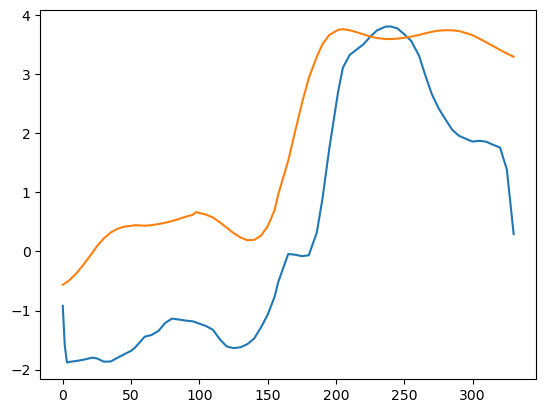

In [115]:
lon = tran_cut.isel(iterations=0).longitude
lat = tran_cut.isel(iterations=0).latitude
Lon, Lat = lon,lat
points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])

sampled_transect_depth_mult = griddata(points, np.array(tran_cut['Theta'].isel(iterations=0,depths=0)).ravel(), (transect_lon, transect_lat))
plt.plot(data.x,sampled_transect_depth_mult)
plt.plot(data.x,data['temperature'].isel(time=0,depth=0))

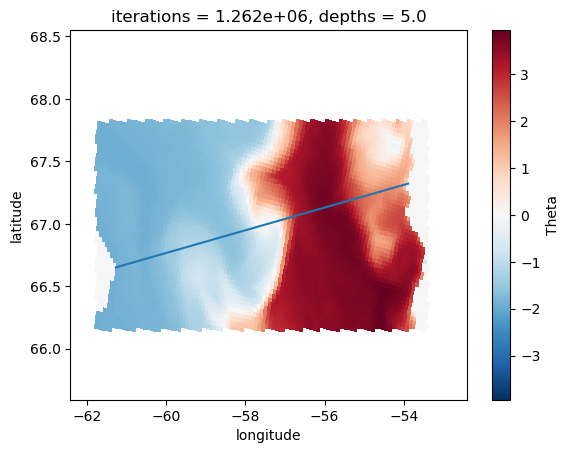

In [214]:
tran_cut['Theta'].isel(iterations=0,depths=0).plot(x='longitude',y='latitude')
plt.plot(transect_lon,transect_lat)
plt.savefig('./transect.png')

In [153]:
#datetime(intyear,month,day)
np.array(tran_cut['depths'])[j]

5.0

In [154]:
points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])
#model_data_subsampled = np.zeros((2,len(tran_cut.time),len(tran_cut['k']),70))
#model_data_subsampled[0,:,:,:] = 'SALT'
#model_data_subsampled[1,:,:,:] = 'THETA'
shape = (50)
# file_path = llc270_data +'grid/RC.data'
# RC = np.fromfile(file_path,'>f4')
# RC = np.reshape(RC, shape)
for i in tqdm(range(0,len(tran_cut.iterations))):
    for j in range(0,len(tran_cut['depths'])):
        tran_cut_time_k = tran_cut.isel(iterations=i,depths=j)
        year = llc1080_files[i].split('.')[1][0:4]
        month = llc1080_files[i].split('.')[1][4:6]
        day = 15
        time = [datetime(int(year),int(month),int(day))]        
        k_num = [np.array(tran_cut['depths'])[j]]
        sampled_transect_salt = griddata(points, np.array(tran_cut_time_k['Salt']).ravel(), (transect_lon, transect_lat))
        sampled_transect_temp = griddata(points, np.array(tran_cut_time_k['Theta']).ravel(), (transect_lon, transect_lat))
        sampled_transect_salt = np.reshape(sampled_transect_salt, (1,1,70))
        sampled_transect_temp = np.reshape(sampled_transect_temp, (1,1,70))
        salt_data = xr.DataArray(sampled_transect_salt ,coords=[time,k_num,data.x],dims=['time','depth','x'],name='Salinity_1080')
        temp_data = xr.DataArray(sampled_transect_temp,coords=[time,k_num,data.x],dims=['time','depth','x'],name='Temperature_1080')
        salt_data.to_netcdf(llc1080_path+'davis-subsample/SALT_'+str(i).zfill(4)+'_'+str(j).zfill(2)+'.nc')
        temp_data.to_netcdf(llc1080_path+'davis-subsample/THETA_'+str(i).zfill(4)+'_'+str(j).zfill(2)+'.nc')

100%|███████████████████████████████████████████| 84/84 [26:26<00:00, 18.89s/it]


In [157]:
llc1080_sub_files, llc1080_sub_filepaths = tools.get_data_paths_from_binary(llc1080_path,'davis-subsample',file_end='nc')
llc1080_subsampled = xr.open_mfdataset(llc1080_sub_filepaths)
llc1080_subsampled.isel()

<xarray.Dataset>
Dimensions:           (time: 84, depth: 50, x: 70)
Coordinates:
  * time              (time) datetime64[ns] 2004-01-15 2004-02-15 ... 2010-12-15
  * depth             (depth) float32 5.0 15.0 25.0 ... 5.461e+03 5.906e+03
  * x                 (x) float32 0.0 1.439 3.027 3.097 ... 320.0 325.0 330.0
Data variables:
    Salinity_1080     (time, depth, x) float64 dask.array<chunksize=(1, 1, 70), meta=np.ndarray>
    Temperature_1080  (time, depth, x) float64 dask.array<chunksize=(1, 1, 70), meta=np.ndarray>

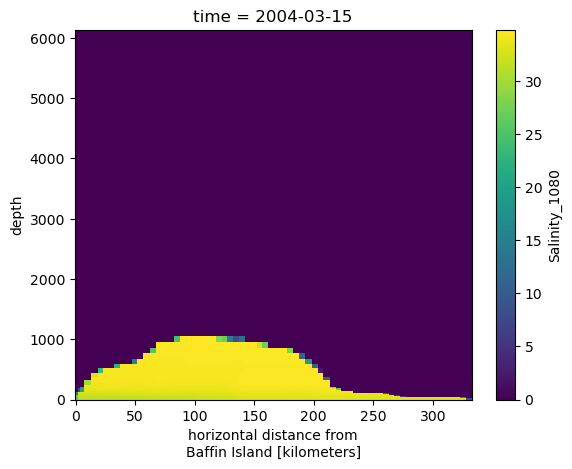

In [180]:
llc1080_subsampled['Salinity_1080'].isel(time=2).plot()

In [196]:
model_llc1080_interp = llc1080_subsampled.isel(time=slice(9,81)).interp(depth=data.depth)

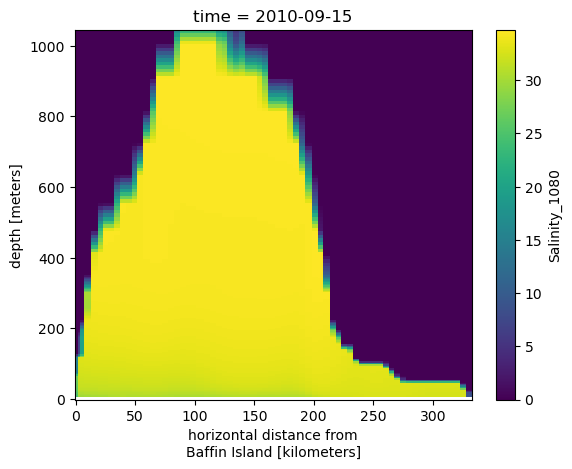

In [197]:
model_llc1080_interp['Salinity_1080'].isel(time=71).plot()


In [198]:
model_llc1080_interp['time'] = model_observe.time

In [189]:
model_observe.time

<xarray.DataArray 'time' (time: 72)>
array(['2004-10-16T12:00:00.000000000', '2004-11-16T00:00:00.000000000',
       '2004-12-16T12:00:00.000000000', '2005-01-16T12:00:00.000000000',
       '2005-02-15T00:00:00.000000000', '2005-03-16T12:00:00.000000000',
       '2005-04-16T00:00:00.000000000', '2005-05-16T12:00:00.000000000',
       '2005-06-16T00:00:00.000000000', '2005-07-16T12:00:00.000000000',
       '2005-08-16T12:00:00.000000000', '2005-09-16T00:00:00.000000000',
       '2005-10-16T12:00:00.000000000', '2005-11-16T00:00:00.000000000',
       '2005-12-16T12:00:00.000000000', '2006-01-16T12:00:00.000000000',
       '2006-02-15T00:00:00.000000000', '2006-03-16T12:00:00.000000000',
       '2006-04-16T00:00:00.000000000', '2006-05-16T12:00:00.000000000',
       '2006-06-16T00:00:00.000000000', '2006-07-16T12:00:00.000000000',
       '2006-08-16T12:00:00.000000000', '2006-09-16T00:00:00.000000000',
       '2006-10-16T12:00:00.000000000', '2006-11-16T00:00:00.000000000',
       '2006-12-16T12:00:00.000000000', '2007-01-16T12:00:00.000000000',
       '2007-02-15T00:00:00.000000000', '2007-03-16T12:00:00.000000000',
       '2007-04-16T00:00:00.000000000', '2007-05-16T12:00:00.000000000',
       '2007-06-16T00:00:00.000000000', '2007-07-16T12:00:00.000000000',
       '2007-08-16T12:00:00.000000000', '2007-09-16T00:00:00.000000000',
       '2007-10-16T12:00:00.000000000', '2007-11-16T00:00:00.000000000',
       '2007-12-16T12:00:00.000000000', '2008-01-16T12:00:00.000000000',
       '2008-02-15T12:00:00.000000000', '2008-03-16T12:00:00.000000000',
       '2008-04-16T00:00:00.000000000', '2008-05-16T12:00:00.000000000',
       '2008-06-16T00:00:00.000000000', '2008-07-16T12:00:00.000000000',
       '2008-08-16T12:00:00.000000000', '2008-09-16T00:00:00.000000000',
       '2008-10-16T12:00:00.000000000', '2008-11-16T00:00:00.000000000',
       '2008-12-16T12:00:00.000000000', '2009-01-16T12:00:00.000000000',
       '2009-02-15T00:00:00.000000000', '2009-03-16T12:00:00.000000000',
       '2009-04-16T00:00:00.000000000', '2009-05-16T12:00:00.000000000',
       '2009-06-16T00:00:00.000000000', '2009-07-16T12:00:00.000000000',
       '2009-08-16T12:00:00.000000000', '2009-09-16T00:00:00.000000000',
       '2009-10-16T12:00:00.000000000', '2009-11-16T00:00:00.000000000',
       '2009-12-16T12:00:00.000000000', '2010-01-16T12:00:00.000000000',
       '2010-02-15T00:00:00.000000000', '2010-03-16T12:00:00.000000000',
       '2010-04-16T00:00:00.000000000', '2010-05-16T12:00:00.000000000',
       '2010-06-16T00:00:00.000000000', '2010-07-16T12:00:00.000000000',
       '2010-08-16T12:00:00.000000000', '2010-09-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2004-10-16T12:00:00 2004-11-16 ... 2010-09-16

In [199]:
model_observe_full = xr.merge([model_llc1080_interp,model_observe])

In [206]:
model_observe_full

<xarray.Dataset>
Dimensions:           (time: 72, x: 70, depth: 161)
Coordinates:
  * time              (time) datetime64[ns] 2004-10-16T12:00:00 ... 2010-09-16
  * x                 (x) float32 0.0 1.439 3.027 3.097 ... 320.0 325.0 330.0
  * depth             (depth) float32 0.0 4.0 8.0 ... 1.02e+03 1.03e+03 1.04e+03
Data variables:
    Salinity_1080     (time, depth, x) float64 dask.array<chunksize=(1, 161, 70), meta=np.ndarray>
    Temperature_1080  (time, depth, x) float64 dask.array<chunksize=(1, 161, 70), meta=np.ndarray>
    salinity_270      (time, depth, x) float64 dask.array<chunksize=(1, 161, 70), meta=np.ndarray>
    temperature_270   (time, depth, x) float64 dask.array<chunksize=(1, 161, 70), meta=np.ndarray>
    area              (x, depth) float32 ...
    lat               (x) float32 66.65 66.65 66.66 66.66 ... 67.3 67.31 67.32
    lon               (x) float32 61.27 61.24 61.21 61.21 ... 54.12 54.0 53.89
    velocity          (time, x, depth) float32 ...
    temperature       (time, x, depth) float32 ...
    salinity          (time, x, depth) float32 31.97 31.97 31.97 ... nan nan nan

(1100.0, 0.0)

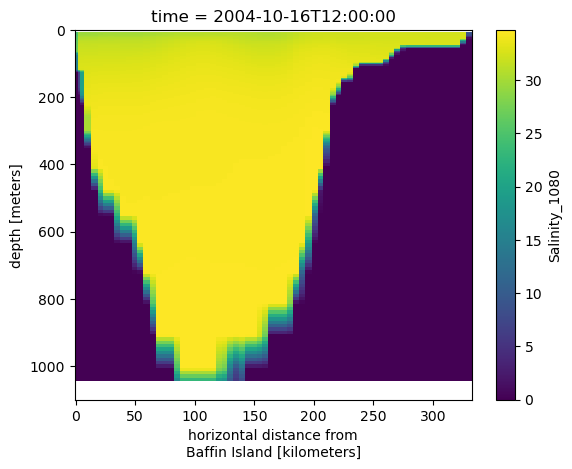

In [205]:
model_observe_full['Salinity_1080'].isel(time=0).plot()
#np.array(model_observe_full['Salinity_1080'].isel(time=0))
plt.ylim(1100,0)

In [207]:
model_observe_full = model_observe_full.rename({'Salinity_1080':'salinity_1080','Temperature_1080':'temperature_1080'})

In [208]:
model_observe_full.to_netcdf(to_hd+'Davis/model_and_observable_dataset.nc')

/tmp/ipykernel_15274/3735826999.py:1: SerializationWarning: saving variable time with floating point data as an integer dtype without any _FillValue to use for NaNs
  model_observe_full.to_netcdf(to_hd+'Davis/model_and_observable_dataset.nc')


In [217]:
time = model_observe_full.time


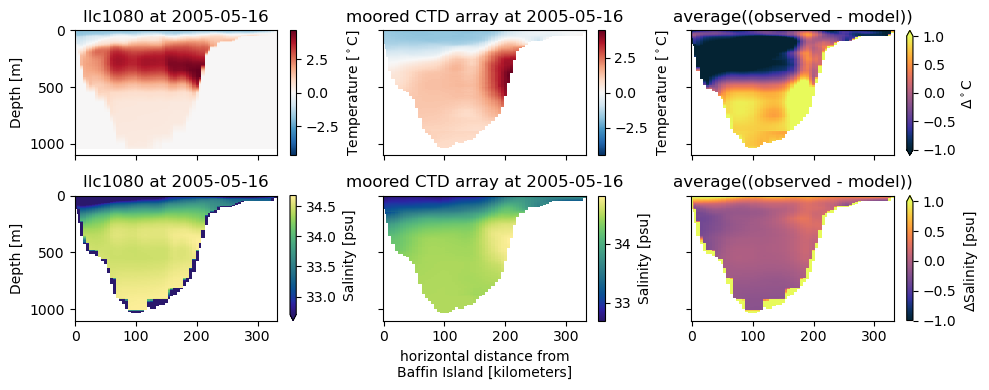

In [218]:

fig,ax = plt.subplots(ncols=3, nrows=2,figsize=(10,4),sharex=True,sharey=True,)

time = np.array(model_observe_full.time)
model_observe_full['temperature_1080'].isel(time=7).plot(ax=ax[0,0],cbar_kwargs={'label':'Temperature [$^\circ$C]'})
ax[0,0].set_title('llc1080 at '+str(time[7])[0:10])
#plt.ylim(0,200)
plt.tight_layout()

#ax.gca().invert_yaxis()

#plt.ylim(-1100,0)
ax[0,0].set_ylabel('Depth [m]')

model_observe_full['temperature'].isel(time=7).plot(y='depth',ax=ax[0,1],cbar_kwargs={'label':'Temperature [$^\circ$C]'})
ax[0,1].set_title('moored CTD array at '+ str(time[7])[0:10])

#plt.ylim(0,1100)temp
ax[0,1].set_ylabel('')
#plt.ylim(0,200)

#plt.gca().invert_yaxis()

diff_temp = model_observe_full['temperature']- model_observe_full['temperature_1080']
diff_temp.mean(dim='time').plot(y='depth',vmin=-1,vmax=1, cmap=cm.cm.thermal,ax=ax[0,2],cbar_kwargs={'label':'$\Delta$$^\circ$C '})
ax[0,2].set_title('average((observed - model))')
ax[0,2].set_ylabel('')
ax[0,2].set_ylim(0,1100)
#plt.ylim(0,200)
#plt.gca().invert_yaxis()

plt.tight_layout()
#plt.subplot(2,3,(1,0))

model_observe_full['salinity_1080'].isel(time=7).where(np.isfinite(model_observe_full['salinity'].isel(time=0))).plot(vmin = 32.7,ax=ax[1,0],cmap=cm.cm.haline,cbar_kwargs={'label':'Salinity [psu]'})
ax[1,0].set_title('llc1080 at '+str(time[7])[0:10])
#plt.ylim(0,200)

#ax.invert_yaxis()

#plt.ylim(-1100,0)
ax[1,0].set_ylabel('Depth [m]')

#plt.subplot(1,3,(1,1))
model_observe_full['salinity'].isel(time=7).plot(y='depth',ax=ax[1,1],cmap=cm.cm.haline,cbar_kwargs={'label':'Salinity [psu]'})
ax[1,1].set_title('moored CTD array at '+ str(time[7])[0:10])

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[0,2].set_xlabel('')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[0,2].set_xlabel('')
ax[1,0].set_xlabel('')
#plt.ylim(0,1100)
ax[1,1].set_ylabel('')
#plt.ylim(0,200)

#plt.gca().invert_yaxis()

diff_temp = model_observe_full['salinity']- model_observe_full['salinity_1080']
diff_temp.mean(dim='time').plot(y='depth',vmin=-1,vmax=1, cmap=cm.cm.thermal,ax=ax[1,2],cbar_kwargs={'label':'$\Delta$Salinity [psu]'})
ax[1,2].set_title('average((observed - model))')
ax[1,2].set_ylabel('')
ax[1,2].set_ylim(0,1100)
#plt.ylim(0,200)
#plt.gca().invert_yaxis()
ax[1,2].set_xlabel('')
ax[1,1].set_ylim(1100,0)
ax[1,0].set_ylim(1100,0)
ax[0,0].set_ylim(1100,0)
ax[0,1].set_ylim(1100,0)
ax[0,2].set_ylim(1100,0)
plt.tight_layout()

plt.savefig('./direct_match_1080.png')

In [122]:
# lon = tran_cut.XC
# lat = tran_cut.YC
# Lon, Lat = lon,lat
# points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])

# #sampled_transect = griddata(points, np.array(tran_cut).ravel(), (transect_lon, transect_lat))
# sampled_transect = griddata(points, np.array(tran_cut.isel(k=0,time=0)).ravel(), (transect_lon, transect_lat))

In [66]:
sampled_transect


array([ 7.99311571, 11.98057145, 16.16729382, 16.36735717, 20.55407954,
       32.52635204, 32.53649558, 32.56275019, 32.58401319, 32.61687326,
       32.65623679, 32.70840572, 32.76057976, 32.81401252, 32.84738236,
       32.9271394 , 32.98285909, 33.03505821, 33.08402569, 33.13512885,
       33.17809003, 33.21480468, 33.24883121, 33.26512088, 33.30514474,
       33.32600309, 33.34730597, 33.36467628, 33.37992032, 33.39451358,
       33.4080059 , 33.42151676, 33.43494162, 33.44856375, 33.46351787,
       33.47195711, 33.49478368, 33.51345473, 33.53450088, 33.55766756,
       33.58755829, 33.61204589, 33.63988991, 33.67511502, 33.69805846,
       33.7264396 , 33.75794863, 33.76675847, 33.76846734, 33.77225669,
       33.7577046 , 33.73829542, 33.7135628 , 33.69007077, 33.66740701,
       33.6435209 , 33.62768473, 33.61582486, 33.60583986, 33.59722401,
       33.59007412, 33.58500892, 33.58049387, 33.57951296, 33.57921527,
       33.58069406, 33.58035277, 33.58121458, 33.25415507,  7.35

In [161]:
data.time

<xarray.DataArray 'time' (time: 2161)>
array([732221.5, 732222.5, 732223.5, ..., 734379.5, 734380.5, 734381.5],
      dtype=float32)
Coordinates:
  * time     (time) float32 7.322e+05 7.322e+05 ... 7.344e+05 7.344e+05
Attributes:
    short_name:  time
    long_name:   Matlab serial date number, 1 is January 0000
    units:       Matlab serial date number

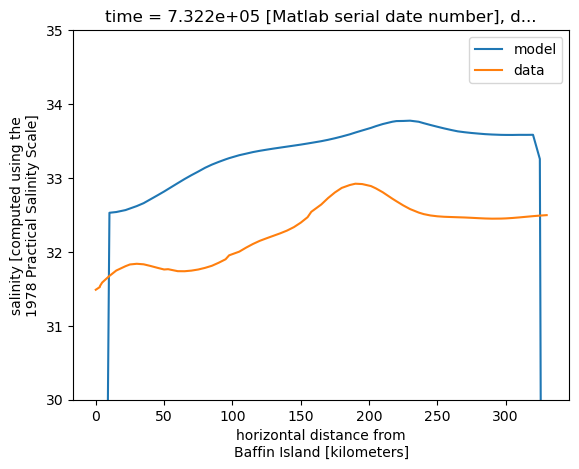

In [73]:
plt.plot(data.x,sampled_transect[sampled_transect>0],label='model')
data['salinity'].isel(depth=0,time=0).plot(label='data')
plt.ylim(30,35)
plt.legend()
plt.savefig('./fixed_nan.png')

In [168]:
data

<xarray.Dataset>
Dimensions:      (time: 2161, x: 70, depth: 161)
Coordinates:
  * time         (time) float32 7.322e+05 7.322e+05 ... 7.344e+05 7.344e+05
  * x            (x) float32 0.0 1.439 3.027 3.097 ... 315.0 320.0 325.0 330.0
  * depth        (depth) float32 0.0 4.0 8.0 12.0 ... 1.02e+03 1.03e+03 1.04e+03
Data variables:
    area         (x, depth) float32 ...
    lat          (x) float32 66.65 66.65 66.66 66.66 ... 67.29 67.3 67.31 67.32
    lon          (x) float32 61.27 61.24 61.21 61.21 ... 54.23 54.12 54.0 53.89
    velocity     (time, x, depth) float32 ...
    temperature  (time, x, depth) float32 ...
    salinity     (time, x, depth) float32 ...
Attributes:
    id:             DS_2004_2010_OA2_monthly.nc
    title:          Monthly objectively mapped Davis Strait salinity, tempera...
    summary:        This file contains monthly objectively mapped Davis Strai...
    institution:    University of Washington, Applied Physics Laboratory, Int...
    creator_name:   Beth Curry and Craig Lee
    creator_email:  beth4cu@uw.edu, craig@apl.washington.edu